In [334]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [335]:
propiedades = pd.read_csv('properati.csv')

/home/mati/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [336]:
#Ya no es necesario 

#Elimino columnas innecesarias
#propiedades.drop(['id', 'geonames_id', 'lat-lon', 'properati_url', 'description', 'title', 'image_thumbnail'], axis = 1, inplace = True)
propiedades.head(2)


,country_name,created_on,currency,expenses,floor,lat,lon,operation,place_name,place_with_parent_names,...,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2
0,NaN,2012-08-08,NaN,850 aprox,10.0,-34.561208,-58.464514,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,...,NaN,NaN,NaN,NaN,apartment,3.0,Capital Federal,NaN,102.0,NaN
1,NaN,2012-08-08,NaN,NaN,11.0,-34.546730,-58.550579,sell,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,...,NaN,NaN,NaN,NaN,apartment,3.0,Bs.As. G.B.A. Zona Norte,NaN,73.0,NaN


In [337]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580055 entries, 0 to 2580054
Data columns (total 21 columns):
country_name                  object
created_on                    object
currency                      object
expenses                      object
floor                         float64
lat                           float64
lon                           float64
operation                     object
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
state_name                    object
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_total_in_m2           float64
dtypes: float64(12), object(9)
memory usage: 413.4+ MB


In [338]:
#ya no es necesario

#Elimino los registros que no sean de Capital Federal o Gran Buenos Aires
#capital = propiedades ['state_name'] == 'Capital Federal'
#gba = propiedades ['state_name'].str.contains('Bs.As. G.B.A.')
#propiedades = propiedades [capital | gba].reset_index()
#propiedades.drop("index", axis = 1, inplace = True)
#propiedades.info()

# podemos reemplazar es por la siguiente linea creo 
#( no lo hice porque en el repo no esta el csv y no se cual tenias)
# propiedades = propiedades.loc[propiedades.state_name.str.contains('Bs.As. G.B.A.|Capital Federal'),:]

In [339]:
#Compruebo que solo haya capital y gba
propiedades.groupby('state_name').agg(np.size)['operation']

state_name
Bs.As. G.B.A. Zona Norte    860300
Bs.As. G.B.A. Zona Oeste    489163
Bs.As. G.B.A. Zona Sur      256490
Capital Federal             974102
Name: operation, dtype: int64

In [340]:
#Reemplazo todos los tipos de Palermo por uno unico
propiedades.loc[propiedades.place_name.str.contains("Palermo", na = False),'place_name'] = 'Palermo'
propiedades.loc[propiedades.place_name.str.contains("Palermo", na = False),'place_name'].value_counts()

Palermo    107108
Name: place_name, dtype: int64

In [341]:
def calcularPrecioM2(fila):
    """Recibe una lista con precio total, superficie total, superficie cubierta y precio por metro cuadrado,
    y calcula este ultimo a partir de los anteriores, cuando es posible"""
    precio_total,superficie_total,superficie_cubierta,precio_m2 = fila
    if (np.isnan(precio_m2)):
        if (superficie_total and not np.isnan(superficie_total)):
            return precio_total/superficie_total
        if(superficie_cubierta and not np.isnan(superficie_cubierta)):
            return precio_total/superficie_cubierta
    return precio_m2

In [342]:
#Calculo el precio por metro cuadrado a partir del precio total y la superficie
propiedades.loc[:,'price_usd_per_m2'] = propiedades.loc[:,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2']].apply(calcularPrecioM2,axis = 1)
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580055 entries, 0 to 2580054
Data columns (total 21 columns):
country_name                  object
created_on                    object
currency                      object
expenses                      object
floor                         float64
lat                           float64
lon                           float64
operation                     object
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
state_name                    object
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_total_in_m2           float64
dtypes: float64(12), object(9)
memory usage: 413.4+ MB


### Como es el precio por metro cuadrado en cada zona? Cuales son los barrios con mayor promedio?

In [343]:
tiene_precio = propiedades['price_usd_per_m2'].notnull()
precio_por_zona = propiedades[tiene_precio].loc[:,['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size,np.mean])
precio_por_zona

price_usd_per_m2             
                                     size         mean
state_name                                            
Bs.As. G.B.A. Zona Norte         646226.0  1844.711121
Bs.As. G.B.A. Zona Oeste         282913.0  1673.545703
Bs.As. G.B.A. Zona Sur           143347.0  1955.272770
Capital Federal                  719396.0  2704.496688

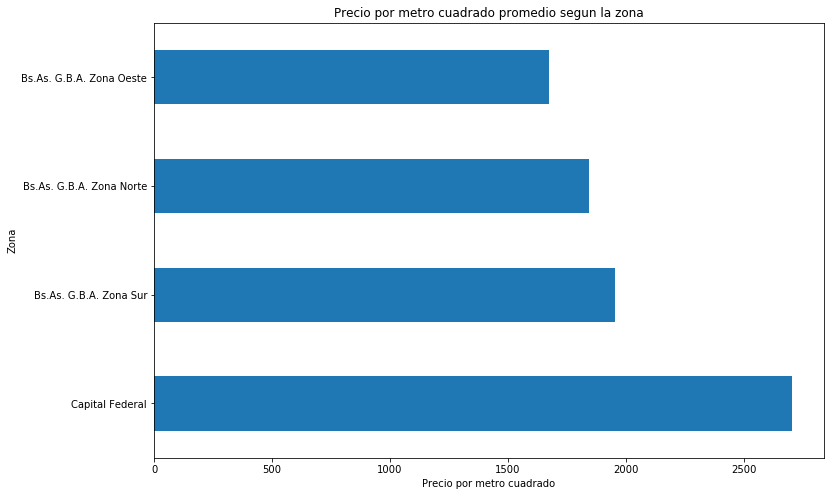

In [344]:
plot = precio_por_zona[('price_usd_per_m2','mean')].sort_values(ascending = False).plot(kind='barh', title = "Precio por metro cuadrado promedio segun la zona", figsize=(12,8));
plot.set_ylabel("Zona")
plot.set_xlabel("Precio por metro cuadrado")

### Para capital federal

In [345]:
precios_capital = propiedades[tiene_precio].loc[propiedades.state_name == 'Capital Federal',['place_name','price_usd_per_m2']]
precios_capital = precios_capital.groupby('place_name').agg([np.size,np.mean])
precios_capital.describe()

price_usd_per_m2             
                  size         mean
count        63.000000    63.000000
mean      11418.984127  2415.149502
std       15914.887406   902.095468
min           1.000000  1072.806069
25%        1733.000000  1939.356758
50%        6417.000000  2238.773840
75%       13287.000000  2647.473271
max       78501.000000  6564.731282

In [346]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_capital = precios_capital[precios_capital[('price_usd_per_m2','size')] > 800]

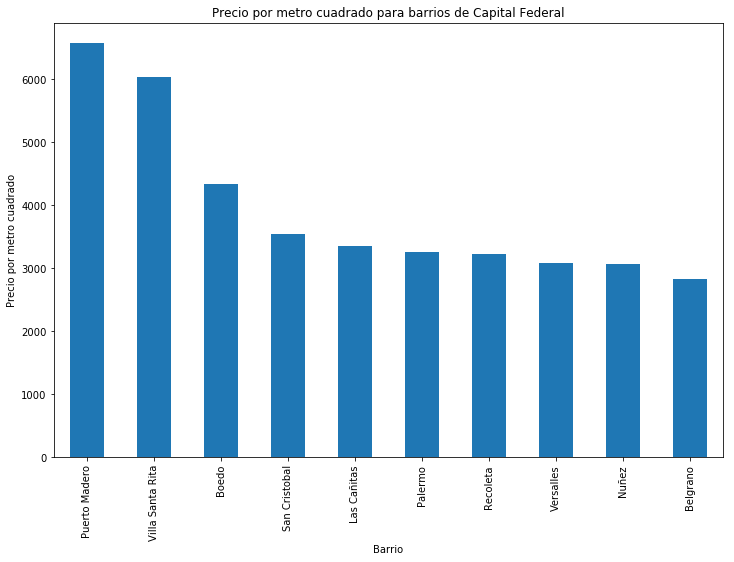

In [347]:
plot = precios_capital[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8));
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de Capital Federal")

### Para gba zona norte

In [348]:
precios_zona_norte = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Norte'),['place_name','price_usd_per_m2']]
precios_zona_norte = precios_zona_norte.groupby('place_name').agg([np.size,np.mean])
precios_zona_norte.describe()

price_usd_per_m2              
                  size          mean
count       343.000000    343.000000
mean       1883.434402   1747.564836
std        7801.665977   2156.197526
min           1.000000     86.700571
25%          18.000000   1020.926218
50%          74.000000   1304.684314
75%         260.500000   1882.613598
max       73135.000000  28453.249374

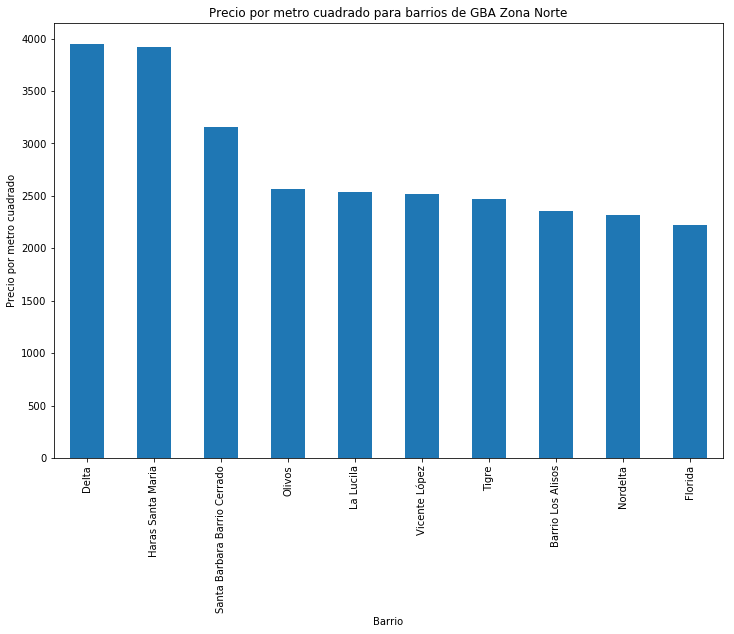

In [349]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_norte = precios_zona_norte[precios_zona_norte[('price_usd_per_m2','size')] > 800]
plot = precios_zona_norte[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8));
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Norte")

### Para gba zona oeste

In [350]:
precios_zona_oeste = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Oeste'),['place_name','price_usd_per_m2']]
precios_zona_oeste = precios_zona_oeste.groupby('place_name').agg([np.size,np.mean])
precios_zona_oeste.describe()

price_usd_per_m2              
                  size          mean
count        88.000000     88.000000
mean       3214.920455   1438.453130
std        7478.579729   1525.732505
min           2.000000     40.870430
25%          73.750000    790.789288
50%         366.000000   1091.880510
75%        2304.750000   1641.686396
max       51751.000000  11598.750000

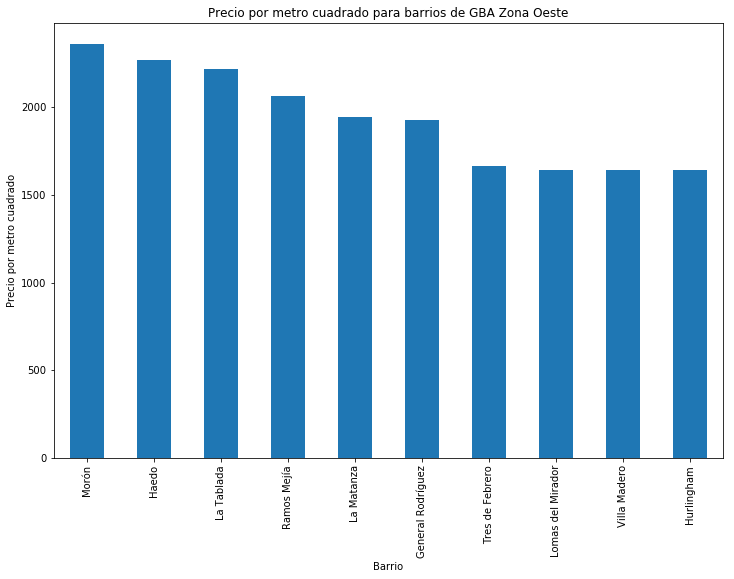

In [351]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_oeste = precios_zona_oeste[precios_zona_oeste[('price_usd_per_m2','size')] > 800]
plot = precios_zona_oeste[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8));
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Oeste")

### Para gba zona sur

In [352]:
precios_zona_sur = propiedades[tiene_precio].loc[propiedades.state_name.str.contains('Zona Sur'),['place_name','price_usd_per_m2']]
precios_zona_sur = precios_zona_sur.groupby('place_name').agg([np.size,np.mean])
precios_zona_sur.describe()

price_usd_per_m2              
                  size          mean
count       147.000000    147.000000
mean        975.149660   2321.380923
std        2685.062749   8733.796429
min           1.000000      0.000000
25%          27.000000    667.237219
50%          80.000000   1086.638090
75%         522.000000   1585.676305
max       23946.000000  98240.530303

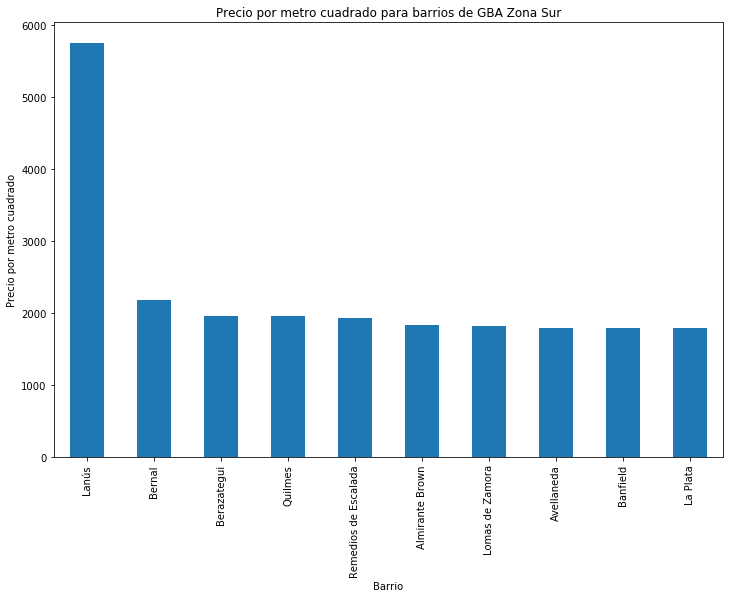

In [353]:
#Tomamos solo aquellos barrios que tengan mas de 800 publicaciones
precios_zona_sur = precios_zona_sur[precios_zona_sur[('price_usd_per_m2','size')] > 800]
plot = precios_zona_sur[('price_usd_per_m2','mean')].sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12,8));
plot.set_xlabel("Barrio")
plot.set_ylabel("Precio por metro cuadrado")
plot.set_title("Precio por metro cuadrado para barrios de GBA Zona Sur")

### Como evoluciono el precio por metro cuadrado al pasar los anios?

In [354]:
def obtener_anio(fecha):
    return fecha.split('-')[0]


In [355]:
def obtener_mes(fecha):
    return fecha.split('-')[1]

In [356]:
propiedades.loc[:,'Year'] = propiedades.loc[:,'created_on'].apply(obtener_anio)
propiedades.loc[:,'Month'] = propiedades.loc[:,'created_on'].apply(obtener_mes)
propiedades.tail(3)

,country_name,created_on,currency,expenses,floor,lat,lon,operation,place_name,place_with_parent_names,...,price_per_m2,price_usd_per_m2,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,Year,Month
2580052,Argentina,2017-08-01,USD,1600,NaN,-34.574470,-58.439483,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,...,2700.000000,2700.000000,house,NaN,Capital Federal,40.0,NaN,40.0,2017,08
2580053,Argentina,2017-08-01,USD,NaN,NaN,-34.496135,-58.500875,sell,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,...,2610.526316,2610.526316,house,NaN,Bs.As. G.B.A. Zona Norte,95.0,NaN,NaN,2017,08
2580054,Argentina,2017-08-01,USD,NaN,NaN,-34.641990,-58.495481,sell,Villa Luro,|Argentina|Capital Federal|Villa Luro|,...,2200.000000,2200.000000,apartment,NaN,Capital Federal,50.0,NaN,NaN,2017,08


In [357]:
precio_por_anio = propiedades[tiene_precio].loc[:,['Year','price_usd_per_m2']].groupby('Year').agg([np.size,np.mean])
precio_por_anio = precio_por_anio.loc[precio_por_anio[('price_usd_per_m2','size')] > 100,:]
precio_por_anio

price_usd_per_m2             
                 size         mean
Year                              
2012          24599.0  1709.806312
2013         353896.0  2186.977967
2014         306859.0  1741.074858
2015         374052.0  1799.759157
2016         422313.0  2271.438618
2017         310163.0  2929.770379

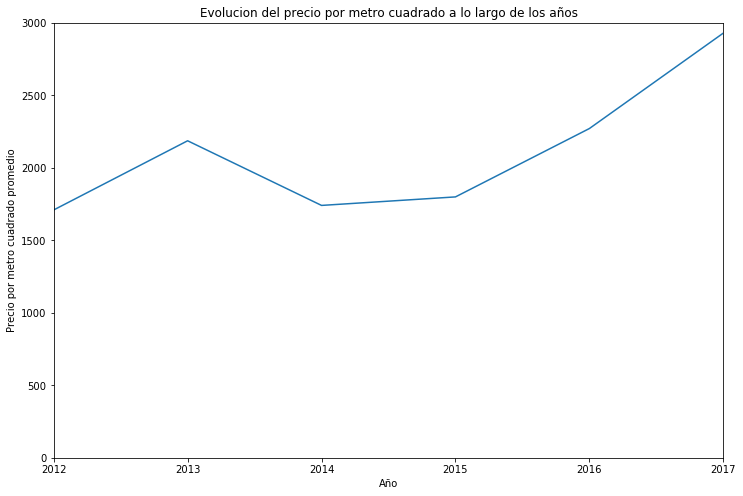

In [358]:
plot = precio_por_anio[('price_usd_per_m2','mean')].plot(figsize=(12,8));
plot.set_xlabel("Año")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_ylim([0,3000])
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años")

### Como evoluciono el precio por metro cuadrado en en cada anio?

In [359]:
precios_2016 = propiedades[tiene_precio].loc[propiedades.Year == '2016',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2015 = propiedades[tiene_precio].loc[propiedades.Year == '2015',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)
precios_2014 = propiedades[tiene_precio].loc[propiedades.Year == '2014',['Month','price_usd_per_m2']].groupby('Month').agg(np.mean)


In [360]:
precios_2016 = precios_2016.rename(columns={'price_usd_per_m2': '2016'}).reset_index()
precios_2015 = precios_2015.rename(columns={'price_usd_per_m2': '2015'}).reset_index()
precios_2014 = precios_2014.rename(columns={'price_usd_per_m2': '2014'}).reset_index()
precios = pd.merge(precios_2016,precios_2015,on='Month',how='outer')
precios = pd.merge(precios,precios_2014,on='Month',how='outer')
precios.set_index('Month', inplace = True)
precios

,2016,2015,2014
Month,,,
01,1741.068787,1975.133076,2096.147836
02,1863.227747,1859.433136,2078.470644
03,1962.531266,1400.998928,1548.479251
04,2471.973662,1874.615434,1832.810728
05,1914.023973,2217.172956,1878.789262
06,2069.175224,1998.878692,1785.966990
07,2083.895454,1808.728410,1664.778292
08,2444.878295,2110.963396,1824.664995
09,2483.439410,1958.741538,1696.540453


(0, 3000)

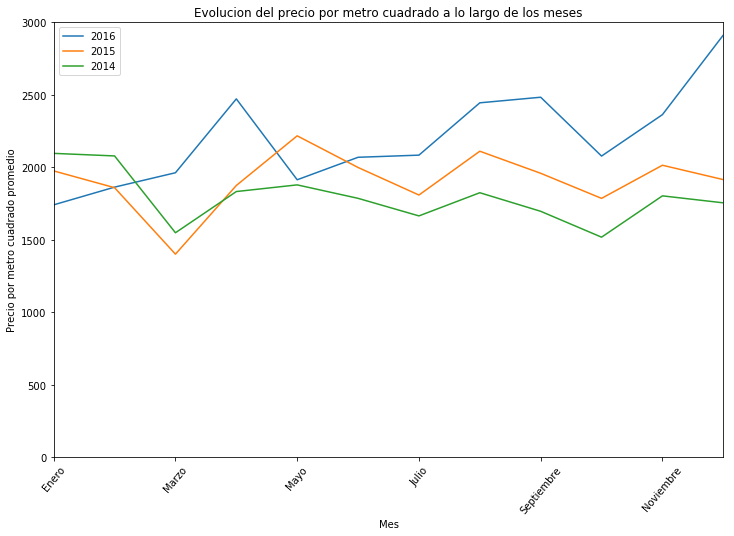

In [361]:
precios.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',\
                 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plot = precios.plot(figsize=(12,8),rot = 50);
plot.set_xlabel("Mes")
plot.set_ylabel("Precio por metro cuadrado promedio")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los meses")
plot.set_ylim([0,3000])


### Que tipo de propiedad se vende mas?

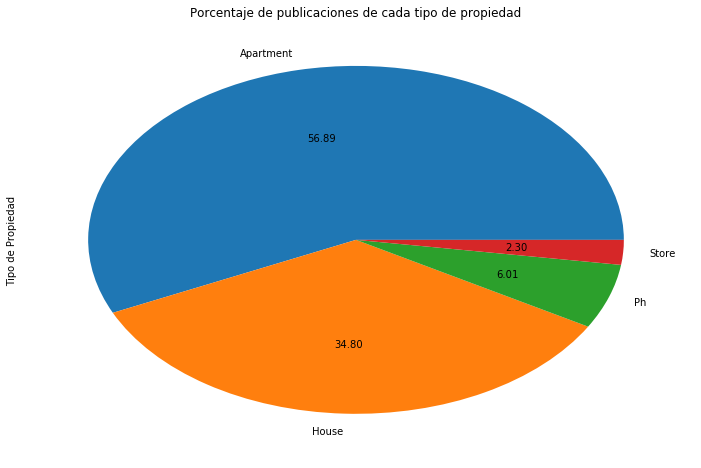

In [362]:
tipos_propiedades = propiedades.loc[:,'property_type'].str.capitalize().value_counts()
plot = tipos_propiedades.plot(kind='pie', figsize=(12,8), autopct='%.2f', label = 'Tipo de Propiedad');
plot.set_title("Porcentaje de publicaciones de cada tipo de propiedad")

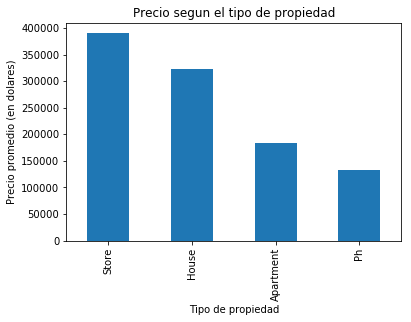

In [363]:
precio_tipos_propiedades = propiedades.loc[:,['property_type','price_aprox_usd']]
precio_tipos_propiedades.loc[:,'property_type'] = precio_tipos_propiedades.loc[:,'property_type'].str.capitalize()
precio_tipos_propiedades = precio_tipos_propiedades.groupby('property_type').agg([np.size,np.mean])
plot = precio_tipos_propiedades.loc[:,('price_aprox_usd','mean')].sort_values(ascending=False).plot(kind = 'bar');

plot.set_xlabel("Tipo de propiedad")
plot.set_ylabel("Precio promedio (en dolares)")
plot.set_title("Precio segun el tipo de propiedad")

### Cual es la relacion entre la superficie cubierta y la cantidad de habitaciones?

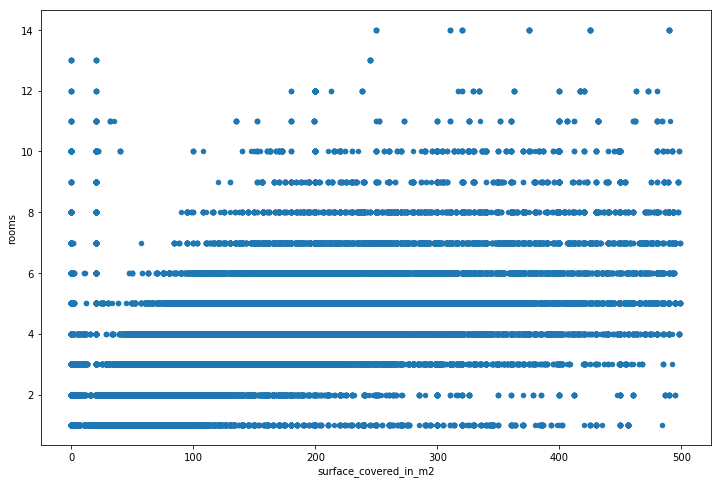

In [364]:
tiene_superficie = propiedades['surface_covered_in_m2'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull()
habitaciones = propiedades.loc[tiene_superficie & tiene_habitaciones,:]
habitaciones = habitaciones.loc[(habitaciones['surface_covered_in_m2'] < 500) & (habitaciones['rooms'] < 15 ),:]
habitaciones.plot.scatter(x = 'surface_covered_in_m2', y = 'rooms', figsize=(12,8))

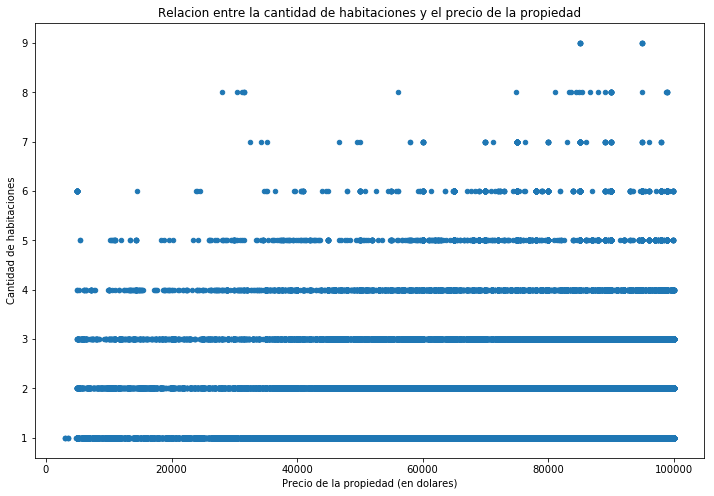

In [365]:
tiene_precio_usd = propiedades['price_aprox_usd'].notnull()
tiene_habitaciones = propiedades['rooms'].notnull() & propiedades['rooms'] > 0
hab = propiedades.loc[tiene_precio_usd & tiene_habitaciones,:]
hab = hab.loc[(hab['price_aprox_usd'] > 1000) & (hab['price_aprox_usd'] < 100000) & (hab['rooms'] < 10),:]
plot = hab.plot.scatter(x = 'price_aprox_usd', y = 'rooms', figsize=(12,8));
plot.set_xlabel("Precio de la propiedad (en dolares)")
plot.set_ylabel("Cantidad de habitaciones")
plot.set_title("Relacion entre la cantidad de habitaciones y el precio de la propiedad")

##### se ve que las propiedades mas baratas no tiene mas de 4-5 habitaciones y que solo las mas caras tiene mas de 6

### Relacion entre los distintos valores de dolar (Creo que no sirve para comparar)

In [366]:
valor_dolar = propiedades.loc[(propiedades['price_aprox_local_currency'].notnull()) & (propiedades['price_aprox_usd'].notnull()),['price_aprox_local_currency','price_aprox_usd','Year']]
valor_dolar ['dolar'] = valor_dolar['price_aprox_local_currency'] / valor_dolar['price_aprox_usd']
valor_dolar = valor_dolar[valor_dolar ['dolar'] > 10]
valor_dolar.describe()

,price_aprox_local_currency,price_aprox_usd,dolar
count,8.672630e+05,8.672630e+05,867263.000000
mean,4.258365e+06,2.618572e+05,16.255944
std,6.363120e+06,3.912684e+05,0.564978
min,4.843214e+04,3.032980e+03,15.968497
25%,1.588866e+06,9.800000e+04,15.968500
50%,2.634802e+06,1.600000e+05,15.968500
75%,4.790550e+06,2.950000e+05,16.029100
max,8.212711e+08,5.000000e+07,17.644500


In [367]:
valor_dolar = valor_dolar.loc[:,['Year', 'dolar']].groupby('Year').agg(np.mean)
valor_dolar

,dolar
Year,
2012,16.685264
2013,17.036983
2014,16.755982
2015,16.231826
2016,16.096579
2017,16.463957


## Tomamos algunos barrios importantes y hacemos comparaciones

In [368]:
barrios = ['Palermo', 'Olivos', 'Lomas de Zamora', 'La Matanza']
df = []
for barrio in barrios:
    a = propiedades[tiene_precio].loc[propiedades.place_name == barrio,['Year','price_usd_per_m2']]\
    .groupby('Year').agg(np.mean).reset_index().rename(columns={'price_usd_per_m2' : barrio})
    df.append(a)

In [369]:
precios_barrios = df[0]
for x in range (1,len(barrios)):
    precios_barrios = pd.merge(precios_barrios,df[x],how='outer')
precios_barrios.set_index("Year",inplace = True)
precios_barrios

,Palermo,Olivos,Lomas de Zamora,La Matanza
Year,,,,
2012,2881.654324,2758.384114,2788.888889,1352.817560
2013,3043.698530,2632.363589,2117.392099,2147.405972
2014,3033.681493,2129.412082,1608.702380,1773.961100
2015,3233.262714,2162.390286,1461.708580,1543.060037
2016,3512.272239,2961.358392,1673.162975,2045.388586
2017,3449.185365,2737.249762,2160.594537,1854.754361


(0, 3600)

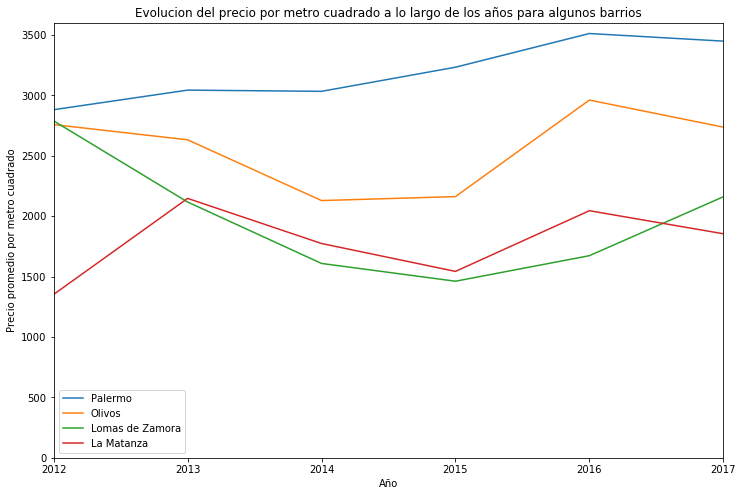

In [370]:
plot = precios_barrios.plot(figsize=(12,8));
plot.set_xlabel("Año")
plot.set_ylabel("Precio promedio por metro cuadrado")
plot.set_title("Evolucion del precio por metro cuadrado a lo largo de los años para algunos barrios")
plot.set_ylim([0,3600])

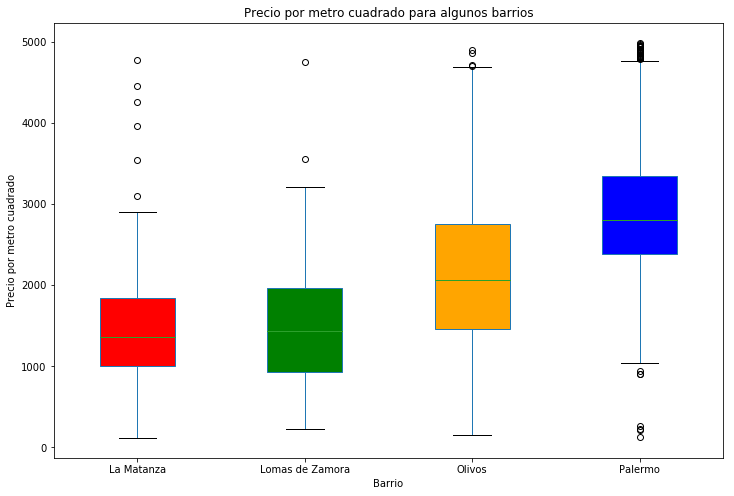

In [371]:
precios_barrios2 = propiedades.loc[(propiedades.Year == '2016') & (propiedades.price_usd_per_m2 < 5000) &\
                        (propiedades.price_usd_per_m2 > 100)&((propiedades.place_name == barrios[0]) | \
                          (propiedades.place_name == barrios[1]) | (propiedades.place_name == barrios[2])\
                        | (propiedades.place_name == barrios[3])),\
        ['lon','place_name','price_usd_per_m2']].pivot_table(index='lon',columns='place_name')
precios_barrios2.columns = precios_barrios2.columns.droplevel()
boxplot = precios_barrios2.plot.box(figsize=(12,8),patch_artist=True,return_type='dict', title="Precio por metro cuadrado para algunos barrios");
ax=plt.gca()
ax.set_ylabel('Precio por metro cuadrado')
ax.set_xlabel('Barrio')


colors = ['red' , 'green', 'orange', 'blue'] #Mismos colores del grafico de lineas de arriba
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
